In [3]:
install.packages("tidyverse")


The downloaded binary packages are in
	/var/folders/j7/tllg_hhn2kx0t24gp9rt8mxw0000gn/T//RtmpavnsZM/downloaded_packages


In [4]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [5]:
# Import the dataset
walstockp <- read_csv("Desktop/Databases/walmart_stock_prices.csv",
col_types = cols(Date = col_factor(), 
                 Dividends = col_factor(),
                'Stock Splits' = col_factor()))


In [6]:
# Preview at the first six rows
head(walstockp,6)

Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1972-08-25 00:00:00-04:00,0.01146260,0.01168308,0.01146260,0.01163866,7526400,0.0,0.0
1972-08-28 00:00:00-04:00,0.01163866,0.01172697,0.01159478,0.01159478,2918400,0.0,0.0
1972-08-29 00:00:00-04:00,0.01155090,0.01155090,0.01146260,0.01146260,5836800,0.0,0.0
1972-08-30 00:00:00-04:00,0.01146260,0.01146260,0.01137429,0.01146260,1228800,0.0,0.0
1972-08-31 00:00:00-04:00,0.01137430,0.01137430,0.01128600,0.01128600,2611200,0.0,0.0
1972-09-01 00:00:00-04:00,0.01133042,0.01137430,0.01133042,0.01137430,768000,0.0,0.0


In [ ]:
#Cleaning Dataset

In [8]:
summary(walstockp)

                        Date            Open                High          
 1972-08-25 00:00:00-04:00:    1   Min.   :2.839e-03   Min.   :2.839e-03  
 1972-08-28 00:00:00-04:00:    1   1st Qu.:3.319e-01   1st Qu.:3.355e-01  
 1972-08-29 00:00:00-04:00:    1   Median :7.362e+00   Median :7.431e+00  
 1972-08-30 00:00:00-04:00:    1   Mean   :1.194e+01   Mean   :1.205e+01  
 1972-08-31 00:00:00-04:00:    1   3rd Qu.:1.486e+01   3rd Qu.:1.503e+01  
 1972-09-01 00:00:00-04:00:    1   Max.   :1.053e+02   Max.   :1.053e+02  
 (Other)                  :13227                                          
      Low                Close               Volume             Dividends    
 Min.   :2.617e-03   Min.   :2.839e-03   Min.   :        0   0.0     :13031  
 1st Qu.:3.292e-01   1st Qu.:3.324e-01   1st Qu.: 11902200   3.3e-05 :    4  
 Median :7.237e+00   Median :7.351e+00   Median : 18756900   2.6e-05 :    4  
 Mean   :1.184e+01   Mean   :1.195e+01   Mean   : 22441841   7.2e-05 :    4  
 3rd Qu.:1

In [9]:
# Examine the structure
str(walstockp)

spc_tbl_ [13,233 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Date        : Factor w/ 13233 levels "1972-08-25 00:00:00-04:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open        : num [1:13233] 0.0115 0.0116 0.0116 0.0115 0.0114 ...
 $ High        : num [1:13233] 0.0117 0.0117 0.0116 0.0115 0.0114 ...
 $ Low         : num [1:13233] 0.0115 0.0116 0.0115 0.0114 0.0113 ...
 $ Close       : num [1:13233] 0.0116 0.0116 0.0115 0.0115 0.0113 ...
 $ Volume      : num [1:13233] 7526400 2918400 5836800 1228800 2611200 ...
 $ Dividends   : Factor w/ 54 levels "0.0","3.3e-05",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Stock Splits: Factor w/ 3 levels "0.0","2.0","3.0": 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "spec")=
  .. cols(
  ..   Date = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   Open = col_double(),
  ..   High = col_double(),
  ..   Low = col_double(),
  ..   Close = col_double(),
  ..   Volume = col_double(),
  ..   Dividends = col_factor(levels = NULL, ordered = FALSE, include_na = 

In [10]:
library(dplyr)

In [48]:

# Create a temporary 'temp_date' column as Date type
walstockp <- walstockp %>%
  mutate(temp_date = as.Date(as.character(Date)))

# View the first few rows with the new temporary column
head(walstockp,2)

# Examine the structure to see the 'temp_date' column
str(walstockp)

Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,temp_date
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<date>
1972-08-25 00:00:00-04:00,0.01146260,0.01168308,0.01146260,0.01163866,7526400,0.0,0.0,1972-08-25
1972-08-28 00:00:00-04:00,0.01163866,0.01172697,0.01159478,0.01159478,2918400,0.0,0.0,1972-08-28


tibble [13,233 × 9] (S3: tbl_df/tbl/data.frame)
 $ Date        : Factor w/ 13233 levels "1972-08-25 00:00:00-04:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Open        : num [1:13233] 0.0115 0.0116 0.0116 0.0115 0.0114 ...
 $ High        : num [1:13233] 0.0117 0.0117 0.0116 0.0115 0.0114 ...
 $ Low         : num [1:13233] 0.0115 0.0116 0.0115 0.0114 0.0113 ...
 $ Close       : num [1:13233] 0.0116 0.0116 0.0115 0.0115 0.0113 ...
 $ Volume      : num [1:13233] 7526400 2918400 5836800 1228800 2611200 ...
 $ Dividends   : Factor w/ 54 levels "0.0","3.3e-05",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Stock Splits: Factor w/ 3 levels "0.0","2.0","3.0": 1 1 1 1 1 1 1 1 1 1 ...
 $ temp_date   : Date[1:13233], format: "1972-08-25" "1972-08-28" ...


In [11]:
walstockp$Date <- as.Date(as.character(walstockp$Date), format = "%Y-%m-%d")


In [12]:
#Identify Missing values
sum(is.na(walstockp))

[1] 0

In [13]:
# Check for duplicate rows
sum(duplicated(walstockp))

[1] 0

In [14]:
#Removing leading and trailing spaces
character_cols <- names(walstockp)[sapply(walstockp, is.character)]
# Function to trim leading and trailing spaces
trim_spaces <- function(x) gsub("^\\s+|\\s+$", "", x)

# Apply the trim_spaces function to all character columns
walstockp[character_cols] <- lapply(walstockp[character_cols], trim_spaces)


In [ ]:
#Derived Data and Technical Indicators

In [15]:
head(walstockp,2)

Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
1972-08-25,0.01146260,0.01168308,0.01146260,0.01163866,7526400,0.0,0.0
1972-08-28,0.01163866,0.01172697,0.01159478,0.01159478,2918400,0.0,0.0


In [16]:
walstockp$MonthYear <- format(walstockp$Date, "%Y-%m")
print(colnames(walstockp)) 
head(walstockp$MonthYear)

[1] "Date"         "Open"         "High"         "Low"          "Close"       
[6] "Volume"       "Dividends"    "Stock Splits" "MonthYear"   


[1] "1972-08" "1972-08" "1972-08" "1972-08" "1972-08" "1972-09"

In [17]:
#Volume of shares traded

#Total Vol
total_volume <- sum(walstockp$Volume, na.rm = TRUE)
cat("Total Volume Traded:", total_volume, "\n")

# Calculate the total volume traded per year
yearly_volume <- aggregate(Volume ~ format(Date, "%Y"), data = walstockp, sum, na.rm = TRUE)
names(yearly_volume) <- c("Year", "TotalVolume")

# Calculate the number of trading days in each year
trading_days_per_year <- aggregate(Date ~ format(Date, "%Y"), data = walstockp, function(x) length(unique(x)))
names(trading_days_per_year) <- c("Year", "TradingDays")

# Merge the yearly volume and trading days
yearly_data <- merge(yearly_volume, trading_days_per_year, by = "Year")

# Calculate the average daily volume per year
yearly_data$AverageDailyVolume <- yearly_data$TotalVolume / yearly_data$TradingDays

# Display the yearly average daily volume
print(yearly_data[, c("Year", "AverageDailyVolume")])







Total Volume Traded: 296972877700 
   Year AverageDailyVolume
1  1972            4290084
2  1973            4843886
3  1974            3439911
4  1975            5265202
5  1976            9004724
6  1977            7089981
7  1978           10742552
8  1979            6929606
9  1980            8379092
10 1981            7872304
11 1982           16815330
12 1983           19332692
13 1984           19465385
14 1985           19381981
15 1986           20017157
16 1987           24880610
17 1988           14836202
18 1989           14775619
19 1990           18500642
20 1991           15868364
21 1992           13735597
22 1993           19763350
23 1994           15742312
24 1995           19088317
25 1996           22211187
26 1997           21239189
27 1998           19696526
28 1999           20050788
29 2000           24347821
30 2001           22577675
31 2002           27250465
32 2003           25040890
33 2004           30014035
34 2005           39457982
35 2006           40

In [18]:
#Volume of shares traded

#Total Vol
total_volume <- sum(walstockp$Volume, na.rm = TRUE)
cat("Total Volume Traded:", total_volume, "\n")

# Calculate the total volume traded per year
yearly_volume <- aggregate(Volume ~ format(Date, "%Y"), data = walstockp, sum, na.rm = TRUE)
names(yearly_volume) <- c("Year", "TotalVolume")

# Calculate the number of trading days in each year
trading_days_per_year <- aggregate(Date ~ format(Date, "%Y"), data = walstockp, function(x) length(unique(x)))
names(trading_days_per_year) <- c("Year", "TradingDays")

# Merge the yearly volume and trading days
yearly_data <- merge(yearly_volume, trading_days_per_year, by = "Year")

# Calculate the average daily volume per year
yearly_data$AverageDailyVolume <- yearly_data$TotalVolume / yearly_data$TradingDays

# Display the yearly average daily volume
print(yearly_data[, c("Year", "AverageDailyVolume")])







Total Volume Traded: 296972877700 
   Year AverageDailyVolume
1  1972            4290084
2  1973            4843886
3  1974            3439911
4  1975            5265202
5  1976            9004724
6  1977            7089981
7  1978           10742552
8  1979            6929606
9  1980            8379092
10 1981            7872304
11 1982           16815330
12 1983           19332692
13 1984           19465385
14 1985           19381981
15 1986           20017157
16 1987           24880610
17 1988           14836202
18 1989           14775619
19 1990           18500642
20 1991           15868364
21 1992           13735597
22 1993           19763350
23 1994           15742312
24 1995           19088317
25 1996           22211187
26 1997           21239189
27 1998           19696526
28 1999           20050788
29 2000           24347821
30 2001           22577675
31 2002           27250465
32 2003           25040890
33 2004           30014035
34 2005           39457982
35 2006           40

In [19]:
#Visualize Daily Averages
library(ggplot2)

In [20]:
#Determine bounds - identify highest daily average and lowest daily average per year
summary(yearly_data$AverageDailyVolume)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
 3439911 15773825 19729938 22143352 27023639 71396833 

In [21]:
sum(is.na(yearly_data$AverageDailyVolume))

[1] 0

In [22]:
library(ggplot2)

bar_plot <- ggplot(yearly_data, aes(x = Year, y = AverageDailyVolume)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = AverageDailyVolume), vjust = -0.5, angle = 90, hjust = 0) +
  labs(title = "Average Daily Volume Traded per Year",
       x = "Year",
       y = "Average Daily Volume") +
  theme_minimal() 

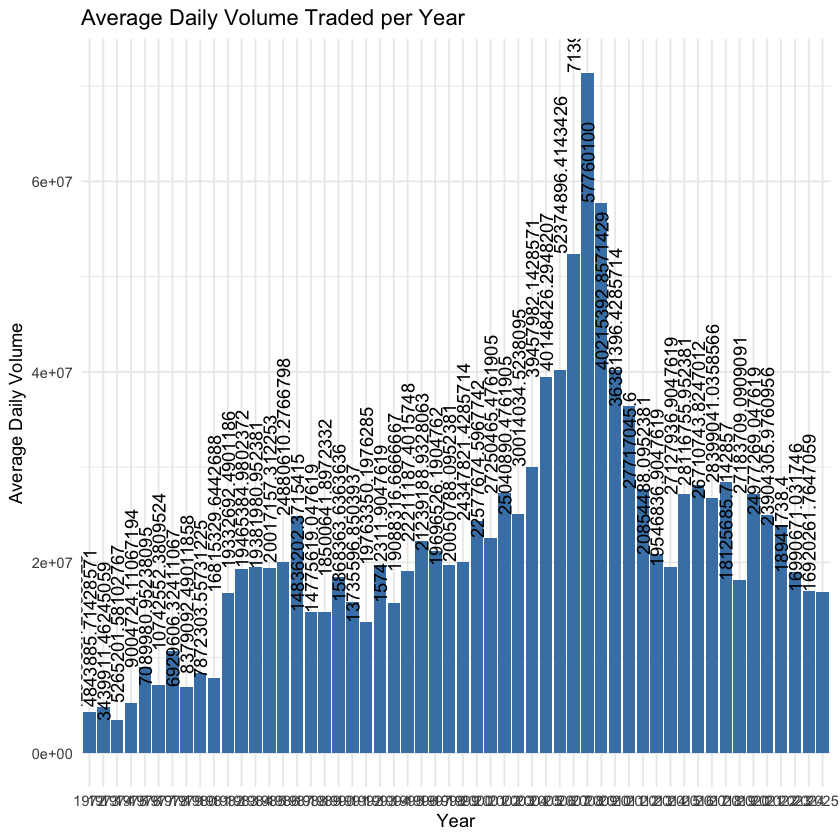

In [23]:
ggplot(yearly_data, aes(x = Year, y = AverageDailyVolume)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = AverageDailyVolume), vjust = -0.5, angle = 90, hjust = 0) +
  labs(title = "Average Daily Volume Traded per Year",
       x = "Year",
       y = "Average Daily Volume") +
  theme_minimal() 

In [24]:
# Save the plot with increased width and/or height (in inches by default)
ggsave("bar_extended_plot.png", plot = bar_plot, width = 14, height = 10) # Wider plot
ggsave("bar_taller_plot.png", plot = bar_plot, width = 10, height = 14,) # Taller plot


In [34]:
#highest opening price and lowest closing price on each day
daily_extremes <- aggregate(cbind(Open, Close) ~ Date,
                           data = walstockp,
                           FUN = function(x) c(HighestOpen = max(x[1]),
                                               LowestClose = min(x[2])))

# Separate the combined result into two columns
daily_extremes$HighestOpen <- daily_extremes$V1[, "HighestOpen"]
daily_extremes$LowestClose <- daily_extremes$V1[, "LowestClose"]

# Remove the combined column
daily_extremes$V1 <- NULL

# Print the resulting dataframe
print(daily_extremes)



            Date Open.HighestOpen Open.LowestClose Close.HighestOpen
1     1972-08-25     1.146260e-02               NA      1.163866e-02
2     1972-08-28     1.163866e-02               NA      1.159478e-02
3     1972-08-29     1.155090e-02               NA      1.146260e-02
4     1972-08-30     1.146260e-02               NA      1.146260e-02
5     1972-08-31     1.137430e-02               NA      1.128600e-02
6     1972-09-01     1.133042e-02               NA      1.137430e-02
7     1972-09-05     1.137430e-02               NA      1.128600e-02
8     1972-09-06     1.137430e-02               NA      1.137430e-02
9     1972-09-07     1.137430e-02               NA      1.133042e-02
10    1972-09-08     1.128600e-02               NA      1.124211e-02
11    1972-09-11     1.133042e-02               NA      1.133042e-02
12    1972-09-12     1.133042e-02               NA      1.133042e-02
13    1972-09-13     1.133042e-02               NA      1.133042e-02
14    1972-09-14     1.133042e-02 

In [38]:
print(head(daily_extremes))

        Date Open.HighestOpen Open.LowestClose Close.HighestOpen
1 1972-08-25       0.01146260               NA        0.01163866
2 1972-08-28       0.01163866               NA        0.01159478
3 1972-08-29       0.01155090               NA        0.01146260
4 1972-08-30       0.01146260               NA        0.01146260
5 1972-08-31       0.01137430               NA        0.01128600
6 1972-09-01       0.01133042               NA        0.01137430
  Close.LowestClose
1                NA
2                NA
3                NA
4                NA
5                NA
6                NA


In [42]:
#The percentage change in stock price each month

library(lubridate)
# Sort the dataframe by date
walstockp <- walstockp %>% arrange(Date)

# Extract year and month
walstockp <- walstockp %>%
  mutate(YearMonth = format(Date, "%Y-%m"))

# Group by month and calculate the first and last closing price
monthly_prices <- walstockp %>%
  group_by(YearMonth) %>%
  summarise(
    FirstClose = first(Close),
    LastClose = last(Close)
  )

# Calculate the percentage change in stock price each month
monthly_prices <- monthly_prices %>%
  mutate(
    PercentageChange = ((LastClose - FirstClose) / FirstClose) * 100
  )
# Print the result
print(monthly_prices)


# A tibble: 631 × 4
   YearMonth FirstClose LastClose PercentageChange
   <chr>          <dbl>     <dbl>            <dbl>
 1 1972-08      0.0116    0.0113             -3.03
 2 1972-09      0.0114    0.0103             -9.69
 3 1972-10      0.0108    0.0114              5.74
 4 1972-11      0.0119    0.0114             -4.45
 5 1972-12      0.0116    0.0122              5.34
 6 1973-01      0.0122    0.0104            -14.4 
 7 1973-02      0.0107    0.0109              2.48
 8 1973-03      0.0108    0.00802           -26.0 
 9 1973-04      0.00807   0.00789            -2.19
10 1973-05      0.00785   0.00776            -1.13
# ℹ 621 more rows


In [46]:
#smooth out price fluctuations and identify trends by calculating moving averages
install.packages("zoo")
library(zoo)
# Sort the dataframe by date
walstockp <- walstockp %>% arrange(Date)

# Define the window sizes for the moving averages
window_short <- 30  # For a shorter-term trend (e.g., 30 days)
window_long <- 90   # For a longer-term trend (e.g., 90 days)

# Calculate the simple moving averages (SMA)
walstockp <- walstockp %>%
  mutate(
    SMA_Short = rollmean(Close, k = window_short, fill = NA, align = "right"),
    SMA_Long = rollmean(Close, k = window_long, fill = NA, align = "right")
  )

# Print the dataframe with moving averages
print(head(walstockp, n = 100)) # Show the first 100 rows with calculated SMAs



The downloaded binary packages are in
	/var/folders/j7/tllg_hhn2kx0t24gp9rt8mxw0000gn/T//RtmpavnsZM/downloaded_packages
# A tibble: 100 × 12
   Date         Open   High    Low  Close  Volume Dividends `Stock Splits`
   <date>      <dbl>  <dbl>  <dbl>  <dbl>   <dbl> <fct>     <fct>         
 1 1972-08-25 0.0115 0.0117 0.0115 0.0116 7526400 0.0       0.0           
 2 1972-08-28 0.0116 0.0117 0.0116 0.0116 2918400 0.0       0.0           
 3 1972-08-29 0.0116 0.0116 0.0115 0.0115 5836800 0.0       0.0           
 4 1972-08-30 0.0115 0.0115 0.0114 0.0115 1228800 0.0       0.0           
 5 1972-08-31 0.0114 0.0114 0.0113 0.0113 2611200 0.0       0.0           
 6 1972-09-01 0.0113 0.0114 0.0113 0.0114  768000 0.0       0.0           
 7 1972-09-05 0.0114 0.0114 0.0113 0.0113 1689600 0.0       0.0           
 8 1972-09-06 0.0114 0.0114 0.0114 0.0114  768000 0.0       0.0           
 9 1972-09-07 0.0114 0.0114 0.0113 0.0113 3532800 0.0       0.0           
10 1972-09-08 0.0113 0.0113 0.011

In [50]:
#Relative Strength Index (RSI) to determine magnitude of recent price changes 
#to evaluate overbought or oversold conditions in the price of a stock or other asset. 
install.packages("TTR")
library(TTR)
# Calculate daily price changes
walstockp <- walstockp %>%
  mutate(PriceChange = Close - lag(Close))

# Calculate gains and losses
walstockp <- walstockp %>%
  mutate(Gain = ifelse(PriceChange > 0, PriceChange, 0),
         Loss = ifelse(PriceChange < 0, abs(PriceChange), 0))

# Define the period for RSI (commonly 14 days)
n <- 14

# Calculate average gain and average loss using exponential moving average
walstockp <- walstockp %>%
  mutate(AvgGain = EMA(Gain, n = n),
         AvgLoss = EMA(Loss, n = n))

# Calculate Relative Strength (RS)
walstockp <- walstockp %>%
  mutate(RS = AvgGain / AvgLoss)

# Calculate Relative Strength Index (RSI)
walstockp <- walstockp %>%
  mutate(RSI = 100 - (100 / (1 + RS)))

# Print the dataframe with RSI
print(tail(walstockp, n = 20)) # Show the last 20 rows with calculated RSI



The downloaded binary packages are in
	/var/folders/j7/tllg_hhn2kx0t24gp9rt8mxw0000gn/T//RtmpavnsZM/downloaded_packages
# A tibble: 20 × 19
   Date        Open  High   Low Close  Volume Dividends `Stock Splits` MonthYear
   <date>     <dbl> <dbl> <dbl> <dbl>   <dbl> <fct>     <fct>          <chr>    
 1 2025-01-24  93.5  95.0  93.5  94.8  1.50e7 0.0       0.0            2025-01  
 2 2025-01-27  95.9  97.5  94.8  97.4  1.89e7 0.0       0.0            2025-01  
 3 2025-01-28  97.2  97.8  96.7  97.3  1.46e7 0.0       0.0            2025-01  
 4 2025-01-29  97.4  98.2  97.2  97.5  1.13e7 0.0       0.0            2025-01  
 5 2025-01-30  97.7  98.9  97.4  98.7  1.10e7 0.0       0.0            2025-01  
 6 2025-01-31  99    99    97.7  98.2  1.64e7 0.0       0.0            2025-01  
 7 2025-02-03  96.8  99.8  96.5  99.5  2.05e7 0.0       0.0            2025-02  
 8 2025-02-04 100.  101.   99.7 101.   1.52e7 0.0       0.0            2025-02  
 9 2025-02-05 101.  103.  101.  102.   1.59e7 0.0

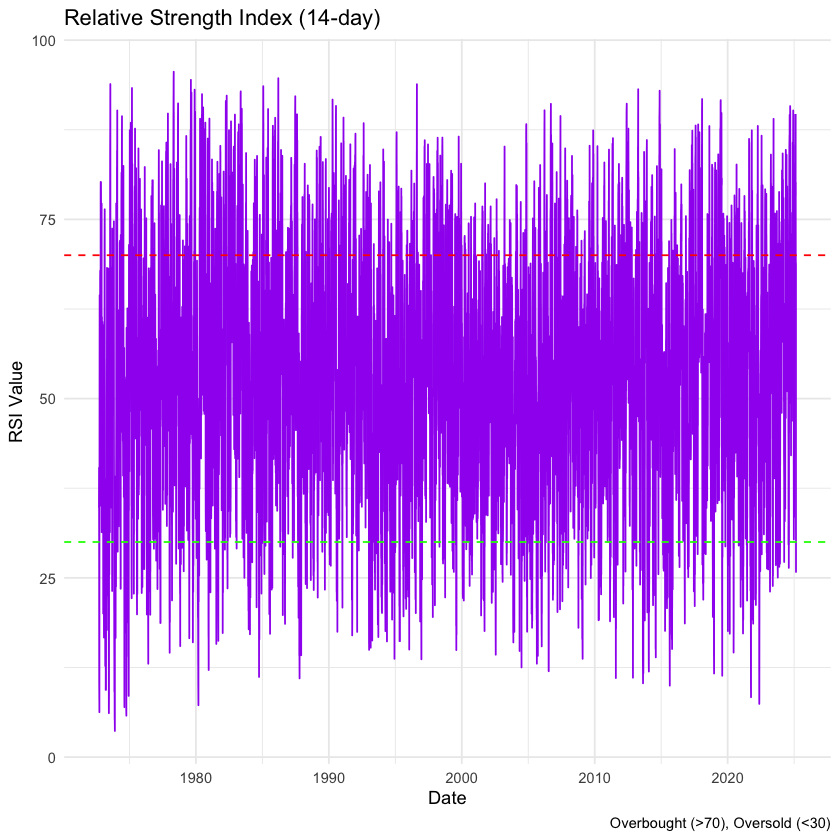

In [52]:
rsi_data_filtered <- walstockp %>%
  filter(!is.na(RSI))

ggplot(rsi_data_filtered, aes(x = Date, y = RSI)) +
  geom_line(color = "purple") +
  geom_hline(yintercept = 70, color = "red", linetype = "dashed") +
  geom_hline(yintercept = 30, color = "green", linetype = "dashed") +
  labs(title = paste0("Relative Strength Index (", n, "-day)"),
       x = "Date",
       y = "RSI Value",
       caption = "Overbought (>70), Oversold (<30)") +
  theme_minimal()

In [54]:
#Bollinger Bands volatility indicators create a band around a moving average, 
#based on the standard deviation of the price.
# Define the period for the moving average (commonly 20 days)
n_ma <- 20

# Define the number of standard deviations for the bands (commonly 2)
n_sd <- 2

# Calculate the Simple Moving Average (SMA)
walstockp <- walstockp %>%
  mutate(SMA = rollmean(Close, k = n_ma, fill = NA, align = "right"))

# Calculate the Standard Deviation of the Close price over the same period
walstockp <- walstockp %>%
  mutate(SD = rollapply(Close, width = n_ma, FUN = sd, fill = NA, align = "right"))

# Calculate the Upper and Lower Bollinger Bands
walstockp <- walstockp %>%
  mutate(UpperBB = SMA + (n_sd * SD),
         LowerBB = SMA - (n_sd * SD))

# Print the dataframe with Bollinger Bands
print(tail(walstockp, n = 30)) # Show the last 30 rows with calculated Bollinger Bands



# A tibble: 30 × 23
   Date        Open  High   Low Close  Volume Dividends `Stock Splits` MonthYear
   <date>     <dbl> <dbl> <dbl> <dbl>   <dbl> <fct>     <fct>          <chr>    
 1 2025-01-08  91.1  91.8  90.8  91.8  1.35e7 0.0       0.0            2025-01  
 2 2025-01-10  92.5  93.6  92.2  93    1.81e7 0.0       0.0            2025-01  
 3 2025-01-13  92.1  92.4  91.1  91.5  1.86e7 0.0       0.0            2025-01  
 4 2025-01-14  91.9  92.0  90.6  90.8  1.35e7 0.0       0.0            2025-01  
 5 2025-01-15  91.1  91.7  90.8  91.3  1.73e7 0.0       0.0            2025-01  
 6 2025-01-16  91.5  91.7  90.1  91.3  1.33e7 0.0       0.0            2025-01  
 7 2025-01-17  92.1  92.3  91.1  91.9  1.59e7 0.0       0.0            2025-01  
 8 2025-01-21  92.5  94.2  92.3  93.1  2.32e7 0.0       0.0            2025-01  
 9 2025-01-22  93.8  94    92.5  93.2  1.56e7 0.0       0.0            2025-01  
10 2025-01-23  93.0  93.8  92.3  93.8  1.42e7 0.0       0.0            2025-01  
# ℹ 20 m

Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 19 rows containing missing values or values outside the scale range
(`geom_line()`).”


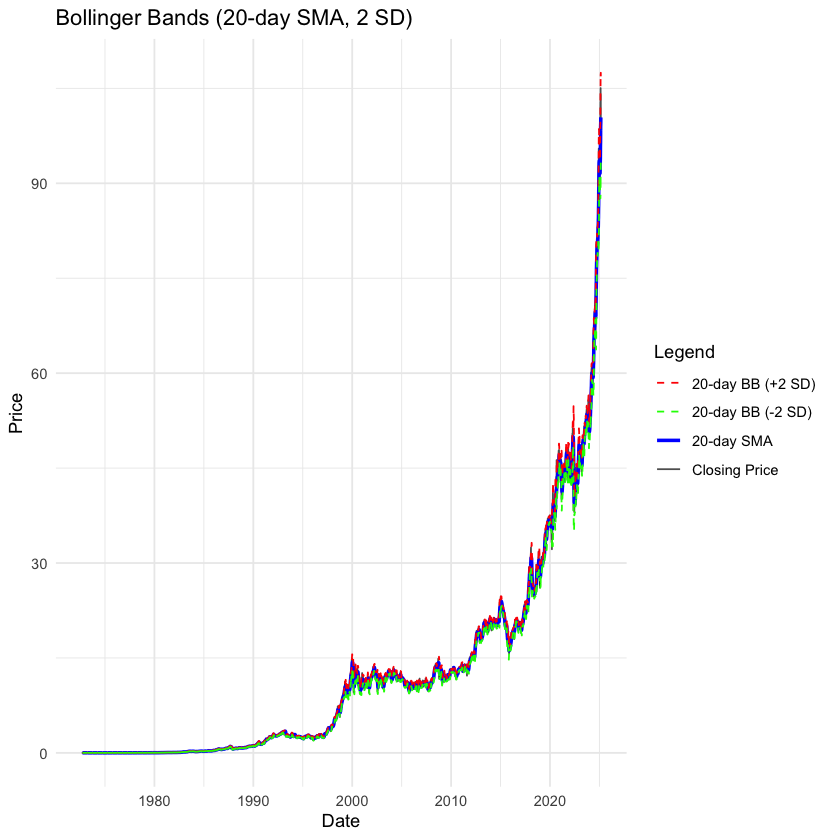

In [61]:
ggplot(walstockp, aes(x = Date)) +
  geom_line(aes(y = Close, color = "Closing Price"), alpha = 0.7) +
  geom_line(aes(y = SMA, color = paste0(n_ma, "-day SMA")), linewidth = 1) +
  geom_line(aes(y = UpperBB, color = paste0(n_ma, "-day BB (+", n_sd, " SD)")), linetype = "dashed") +
  geom_line(aes(y = LowerBB, color = paste0(n_ma, "-day BB (-", n_sd, " SD)")), linetype = "dashed") +
  labs(title = paste0("Bollinger Bands (", n_ma, "-day SMA, ", n_sd, " SD)"),
       x = "Date",
       y = "Price",
       color = "Legend") +
  theme_minimal() +
 scale_color_manual(
    name = "Legend",
    values = setNames(
      c("black", "blue", "red", "green"),
      c("Closing Price", paste0(n_ma, "-day SMA"),
        paste0(n_ma, "-day BB (+", n_sd, " SD)"),
        paste0(n_ma, "-day BB (-", n_sd, " SD)")
      )
    )
  )

In [63]:
walstockp <- walstockp %>%
  mutate(PriceChange = Close - lag(Close, default = first(Close))) %>%
  mutate(OBV_Change = ifelse(PriceChange > 0, Volume,
                             ifelse(PriceChange < 0, -Volume, 0))) %>%
  mutate(OBV = cumsum(OBV_Change))

# Print the dataframe with OBV
print(tail(walstockp, n = 30))



# A tibble: 30 × 25
   Date        Open  High   Low Close  Volume Dividends `Stock Splits` MonthYear
   <date>     <dbl> <dbl> <dbl> <dbl>   <dbl> <fct>     <fct>          <chr>    
 1 2025-01-08  91.1  91.8  90.8  91.8  1.35e7 0.0       0.0            2025-01  
 2 2025-01-10  92.5  93.6  92.2  93    1.81e7 0.0       0.0            2025-01  
 3 2025-01-13  92.1  92.4  91.1  91.5  1.86e7 0.0       0.0            2025-01  
 4 2025-01-14  91.9  92.0  90.6  90.8  1.35e7 0.0       0.0            2025-01  
 5 2025-01-15  91.1  91.7  90.8  91.3  1.73e7 0.0       0.0            2025-01  
 6 2025-01-16  91.5  91.7  90.1  91.3  1.33e7 0.0       0.0            2025-01  
 7 2025-01-17  92.1  92.3  91.1  91.9  1.59e7 0.0       0.0            2025-01  
 8 2025-01-21  92.5  94.2  92.3  93.1  2.32e7 0.0       0.0            2025-01  
 9 2025-01-22  93.8  94    92.5  93.2  1.56e7 0.0       0.0            2025-01  
10 2025-01-23  93.0  93.8  92.3  93.8  1.42e7 0.0       0.0            2025-01  
# ℹ 20 m

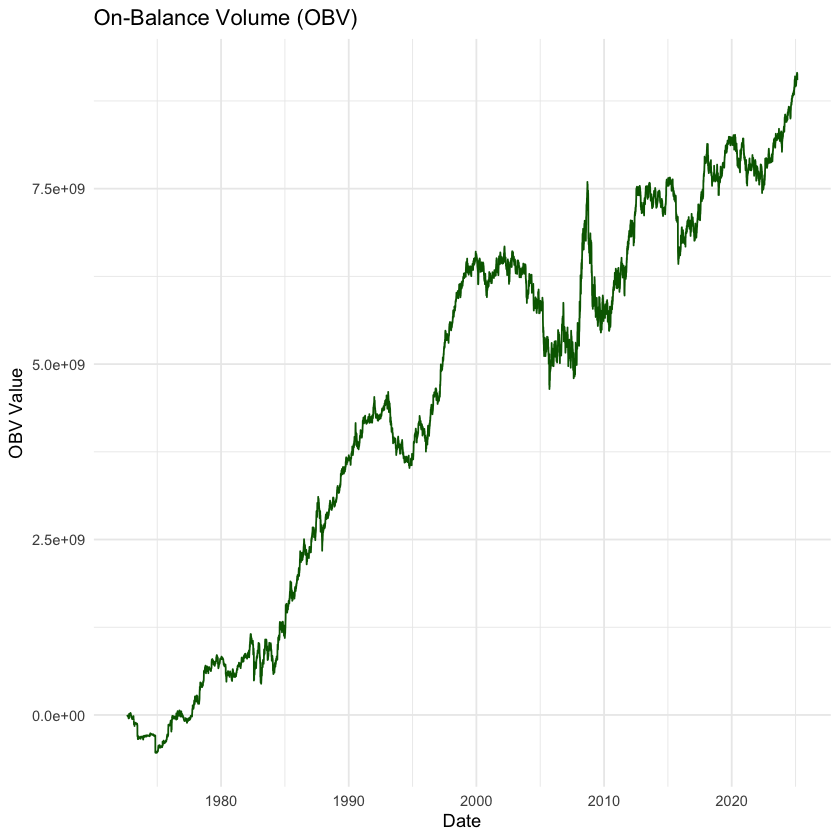

In [64]:
# Visualize OBV
ggplot(walstockp, aes(x = Date, y = OBV)) +
  geom_line(color = "darkgreen") +
  labs(title = "On-Balance Volume (OBV)",
       x = "Date",
       y = "OBV Value") +
  theme_minimal()

In [65]:
# Calculate daily returns
walstockp <- walstockp %>%
  mutate(Return = (Close - lag(Close)) / lag(Close))

# Define the window for calculating rolling standard deviation (e.g., 20 days)
n_sd <- 20

# Calculate the rolling standard deviation of returns
walstockp <- walstockp %>%
  mutate(Volatility_SD = rollapply(Return, width = n_sd, FUN = sd, fill = NA, align = "right"))

# Print the dataframe with volatility
print(tail(walstockp, n = 30))



# A tibble: 30 × 27
   Date        Open  High   Low Close  Volume Dividends `Stock Splits` MonthYear
   <date>     <dbl> <dbl> <dbl> <dbl>   <dbl> <fct>     <fct>          <chr>    
 1 2025-01-08  91.1  91.8  90.8  91.8  1.35e7 0.0       0.0            2025-01  
 2 2025-01-10  92.5  93.6  92.2  93    1.81e7 0.0       0.0            2025-01  
 3 2025-01-13  92.1  92.4  91.1  91.5  1.86e7 0.0       0.0            2025-01  
 4 2025-01-14  91.9  92.0  90.6  90.8  1.35e7 0.0       0.0            2025-01  
 5 2025-01-15  91.1  91.7  90.8  91.3  1.73e7 0.0       0.0            2025-01  
 6 2025-01-16  91.5  91.7  90.1  91.3  1.33e7 0.0       0.0            2025-01  
 7 2025-01-17  92.1  92.3  91.1  91.9  1.59e7 0.0       0.0            2025-01  
 8 2025-01-21  92.5  94.2  92.3  93.1  2.32e7 0.0       0.0            2025-01  
 9 2025-01-22  93.8  94    92.5  93.2  1.56e7 0.0       0.0            2025-01  
10 2025-01-23  93.0  93.8  92.3  93.8  1.42e7 0.0       0.0            2025-01  
# ℹ 20 m

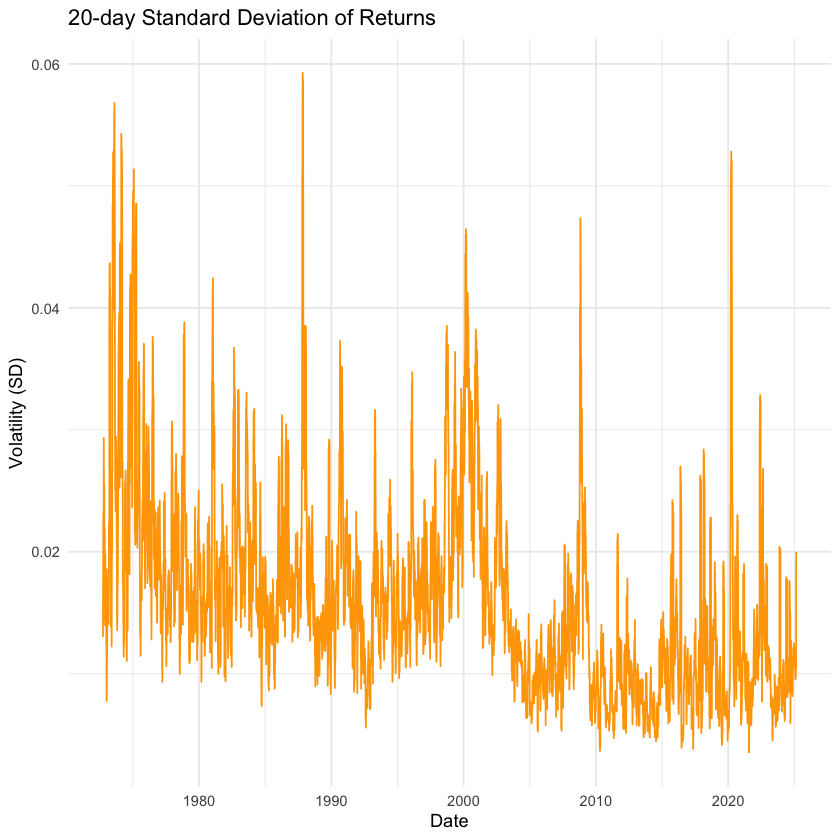

In [67]:
# Visualize Volatility (Standard Deviation of Returns)
volatility_data_filtered <- walstockp %>%
  filter(!is.na(Volatility_SD))

ggplot(volatility_data_filtered, aes(x = Date, y = Volatility_SD)) +
  geom_line(color = "orange") +
  labs(title = paste0(n_sd, "-day Standard Deviation of Returns"),
       x = "Date",
       y = "Volatility (SD)") +
  theme_minimal()

In [68]:
#Linear regression to determine if there is a statistically significant trend 
#in the average daily closing price over time

model_price_trend <- lm(Close ~ as.numeric(Date), data = walstockp)
summary(model_price_trend)




Call:
lm(formula = Close ~ as.numeric(Date), data = walstockp)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.911  -5.858  -2.824   4.178  70.465 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -1.295e+01  1.684e-01  -76.88   <2e-16 ***
as.numeric(Date)  2.361e-03  1.414e-05  166.92   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.003 on 13231 degrees of freedom
Multiple R-squared:  0.678,	Adjusted R-squared:  0.678 
F-statistic: 2.786e+04 on 1 and 13231 DF,  p-value: < 2.2e-16


In [71]:
#ANOVA to compare the mean 'Volume' across different years.
#Determine if there is there a statistically significant difference in the 
#average trading volume between different years?

walstockp$Year <- format(walstockp$Date, "%Y")
anova_volume_year <- aov(Volume ~ Year, data = walstockp)
summary(anova_volume_year)

# Interpretation:
# - A small p-value in the ANOVA summary suggests that there is a statistically significant difference in average volume between at least two years.
# - To find out which specific years differ, you can perform a post-hoc test like Tukey's HSD:
TukeyHSD(anova_volume_year)

               Df    Sum Sq   Mean Sq F value Pr(>F)    
Year           53 2.188e+18 4.127e+16   237.8 <2e-16 ***
Residuals   13179 2.287e+18 1.736e+14                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Volume ~ Year, data = walstockp)

$Year
                  diff          lwr          upr     p adj
1973-1972    553801.99  -6074952.80   7182556.78 1.0000000
1974-1972   -850172.26  -7475592.99   5775248.48 1.0000000
1975-1972    975117.86  -5650302.88   7600538.60 1.0000000
1976-1972   4714640.39  -1910780.35  11340061.13 0.7758634
1977-1972   2799897.23  -3828857.56   9428652.02 0.9999951
1978-1972   6452468.66   -176286.13  13081223.45 0.0727265
1979-1972   2639522.60  -3985898.13   9264943.34 0.9999992
1980-1972   4089008.77  -2536411.97  10714429.51 0.9621070
1981-1972   3582219.84  -3043200.90  10207640.57 0.9966943
1982-1972  12525245.92   5899825.19  19150666.66 0.0000000
1983-1972  15042608.77   8417188.03  21668029.51 0.0000000
1984-1972  15175301.26   8549880.52  21800722.00 0.0000000
1985-1972  15091897.23   8463142.44  21720652.02 0.0000000
1986-1972  15727073.59   9101652.86  22

In [72]:
#Correlation test to determine if there is a statistically significant correlation between 
#the 'Open' price and the 'Close' price on the same day?
cor.test(walstockp$Open, walstockp$Close)


	Pearson's product-moment correlation

data:  walstockp$Open and walstockp$Close
t = 8637.2, df = 13231, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9999083 0.9999143
sample estimates:
      cor 
0.9999113 


In [73]:
#one-sample t-test to determine if Is the average daily price 
#change significantly different from zero?
walstockp <- walstockp %>%
  mutate(DailyChange = Close - Open)

t.test(walstockp$DailyChange, mu = 0)




	One Sample t-test

data:  walstockp$DailyChange
t = 1.9042, df = 13232, p-value = 0.0569
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.0001027651  0.0071004692
sample estimates:
  mean of x 
0.003498852 


In [20]:
head(walstockp,6)

Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,temp_date
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<date>
1972-08-25,0.01146260,0.01168308,0.01146260,0.01163866,7526400,0.0,0.0,1972-08-25
1972-08-28,0.01163866,0.01172697,0.01159478,0.01159478,2918400,0.0,0.0,1972-08-28
1972-08-29,0.01155090,0.01155090,0.01146260,0.01146260,5836800,0.0,0.0,1972-08-29
1972-08-30,0.01146260,0.01146260,0.01137429,0.01146260,1228800,0.0,0.0,1972-08-30
1972-08-31,0.01137430,0.01137430,0.01128600,0.01128600,2611200,0.0,0.0,1972-08-31
1972-09-01,0.01133042,0.01137430,0.01133042,0.01137430,768000,0.0,0.0,1972-09-01
